<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
#file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv('survey-data.csv')

#Display the top 10 records
df.head()


,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,...,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_Databricks,PlatformHaveWorkedWith_PythonAnywhere,PlatformHaveWorkedWith_Vultr,PlatformHaveWorkedWith_OpenStack,PlatformHaveWorkedWith_AlibabaCloud,PlatformHaveWorkedWith_IBMCloudOrWatson,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_Colocation,ExperienceRange
0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,no answer,...,0,0,0,0,0,0,0,0,0,0-5
1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",no answer,...,0,0,0,0,0,0,0,0,0,10-20
2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,no answer,...,0,0,0,0,0,0,0,0,0,>20
3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",no answer,...,0,0,0,0,0,0,0,0,0,0-5
4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",no answer,...,0,0,0,0,0,0,0,0,0,0-5


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


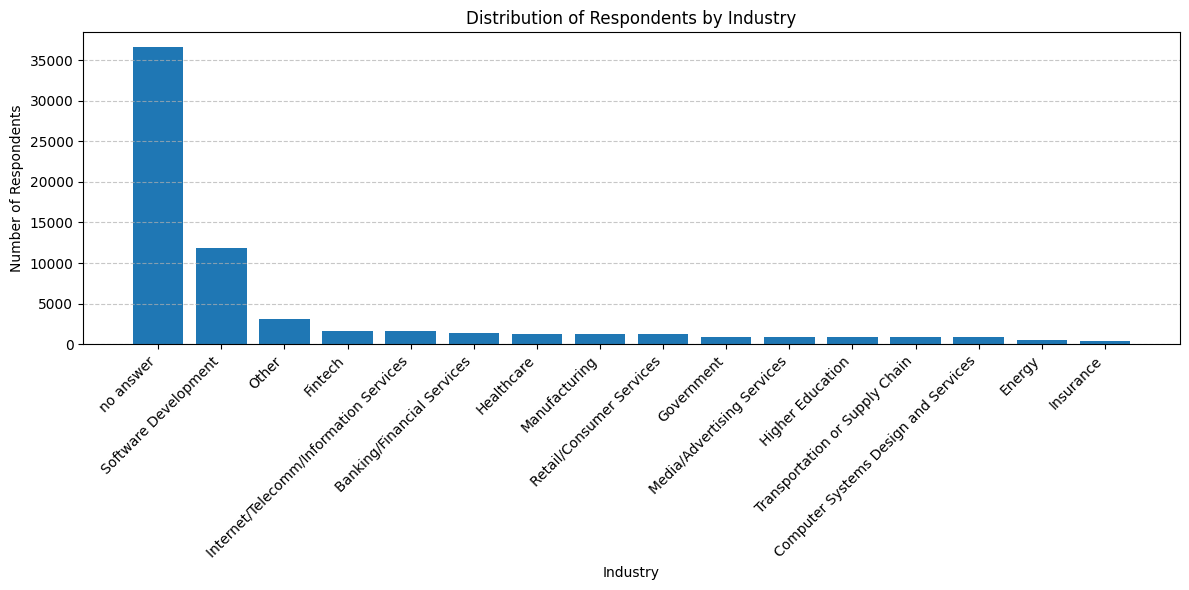

Industries with above-average respondents:
Industry
no answer               36579
Software Development    11918
Name: count, dtype: int64


In [3]:
# Count the number of respondents in each industry
industry_counts = df['Industry'].value_counts()

# Plot a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
plt.bar(industry_counts.index, industry_counts.values)
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify and print notable trends
average_count = industry_counts.mean()
notable_trends = industry_counts[industry_counts > average_count]
print("Industries with above-average respondents:")
print(notable_trends)

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
df['ConvertedCompYearly'].unique()

array([     0.,   7322.,  30074., ...,  15637.,   9711., 116844.])

In [5]:
df['ConvertedCompYearly'].describe()

count    6.543700e+04
mean     3.085486e+04
std      1.191508e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.076300e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [6]:
# Exclude rows where ConvertedCompYearly is 0
df_filtered = df[df['ConvertedCompYearly'] > 0]

In [7]:
# Calculate basic statistics for `ConvertedCompYearly`
mean_comp = df_filtered['ConvertedCompYearly'].mean()
median_comp = df_filtered['ConvertedCompYearly'].median()
std_dev_comp = df_filtered['ConvertedCompYearly'].std()

# Define the threshold as 3 standard deviations above the mean
threshold = mean_comp + (3 * std_dev_comp)

# Identify respondents with compensation exceeding the threshold
high_comp_respondents = df_filtered[df_filtered['ConvertedCompYearly'] > threshold]

# Print statistics and high compensation respondents
print(f"Mean Yearly Compensation: {mean_comp}")
print(f"Median Yearly Compensation: {median_comp}")
print(f"Standard Deviation of Yearly Compensation: {std_dev_comp}")
print(f"Threshold for High Compensation: {threshold}")
print(f"Number of Respondents with High Compensation: {len(high_comp_respondents)}")
print(high_comp_respondents)

Mean Yearly Compensation: 86155.28726264134
Median Yearly Compensation: 65000.0
Standard Deviation of Yearly Compensation: 186756.97308629757
Threshold for High Compensation: 646426.2065215341
Number of Respondents with High Compensation: 89
       Unnamed: 0  ResponseId                              MainBranch    Age  \
529           529         530                 developer by profession  25-34   
828           828         829                 developer by profession  35-44   
1932         1932        1933                 developer by profession  25-34   
2171         2171        2172                 developer by profession  35-44   
2187         2187        2188                 developer by profession  35-44   
...           ...         ...                                     ...    ...   
38219       38219       38220  code sometimes as part of work/studies  35-44   
39643       39643       39644                 developer by profession  35-44   
40066       40066       40067         

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [8]:
# Calculate the IQR
Q1 = df_filtered['ConvertedCompYearly'].quantile(0.25)
Q3 = df_filtered['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_filtered[(df_filtered['ConvertedCompYearly'] < lower_bound) | (df_filtered['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print statistics and outliers
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of Outliers: {num_outliers}")

Q1 (25th percentile): 32712.0
Q3 (75th percentile): 107971.5
IQR: 75259.5
Lower Bound for Outliers: -80177.25
Upper Bound for Outliers: 220860.75
Number of Outliers: 978


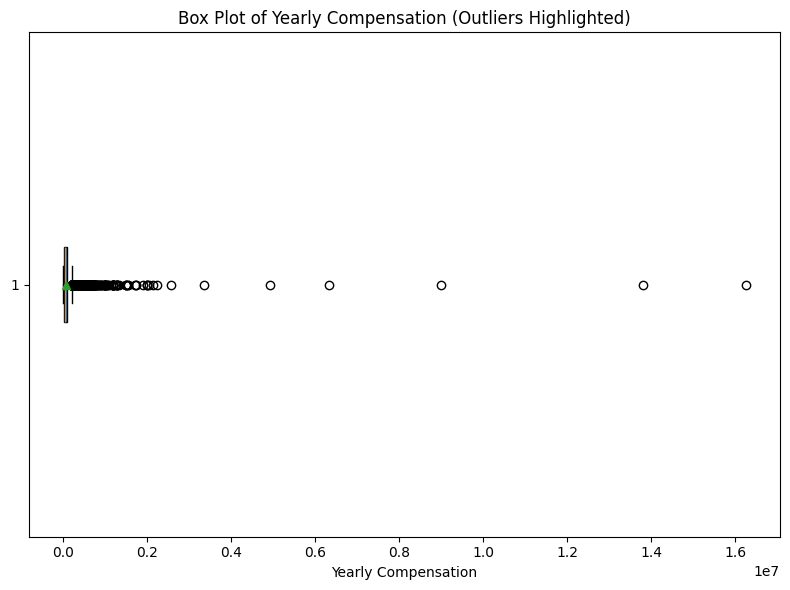

In [9]:
# Visualize using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['ConvertedCompYearly'].dropna(), vert=False, patch_artist=True, showmeans=True)
plt.title('Box Plot of Yearly Compensation (Outliers Highlighted)')
plt.xlabel('Yearly Compensation')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [10]:
# Create a new DataFrame excluding rows with outliers
df_no_outliers = df_filtered[(df_filtered['ConvertedCompYearly'] >= lower_bound) & 
                              (df_filtered['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
original_size = df_filtered.shape[0]
new_size = df_no_outliers.shape[0]

print(f"Original DataFrame Size (after filtering zeros): {original_size}")
print(f"New DataFrame Size (without outliers): {new_size}")
print(f"Number of rows removed: {original_size - new_size}")

Original DataFrame Size (after filtering zeros): 23435
New DataFrame Size (without outliers): 22457
Number of rows removed: 978


In [11]:

# Replace values greater than the upper bound with 0
df.loc[df['ConvertedCompYearly'] > upper_bound, 'ConvertedCompYearly'] = 0


In [12]:
df.to_csv('survey-data.csv')


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [13]:
import numpy as np

In [14]:
# Transform the Age column (if it contains ranges or categories, map to numeric values)
# Example: Assume Age is categorical like '18-24', '25-34', etc.
age_mapping = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 29,
    '35-44': 39,
    '45-54': 49,
    '55-64': 59,
    'above 65': 70,
    'non answer': np.nan
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

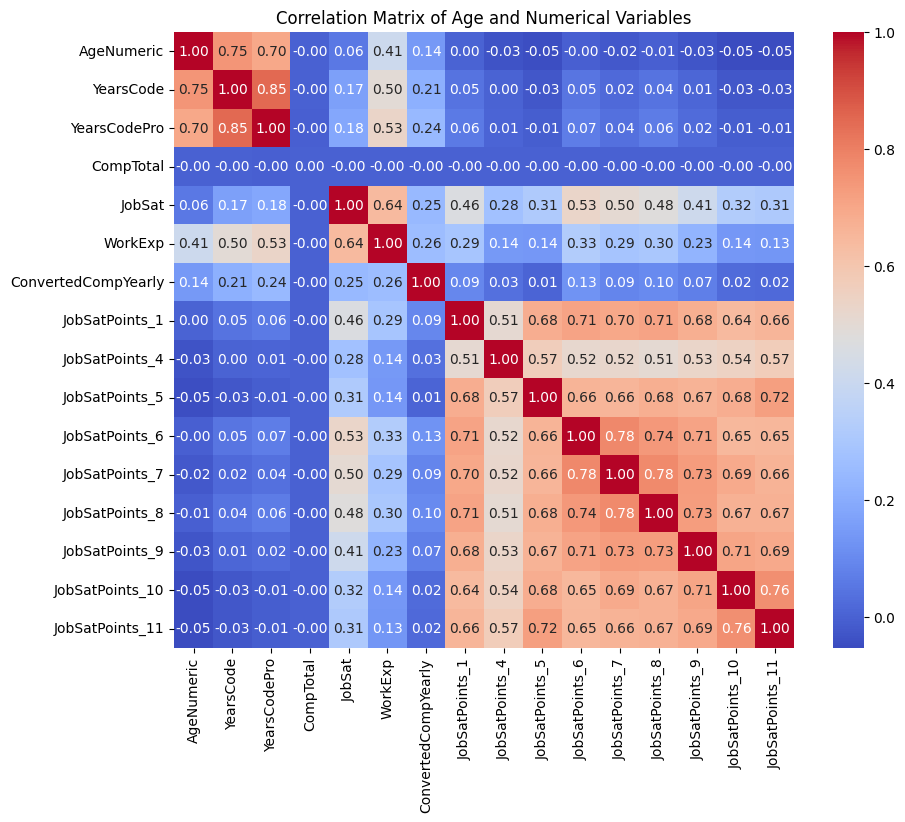

In [15]:
# Drop rows with NaN values in AgeNumeric for accurate correlation analysis
df_numeric = df.dropna(subset=['AgeNumeric'])

# Select numerical columns for correlation analysis
numerical_columns = ['AgeNumeric', 'YearsCode', 'YearsCodePro', 'CompTotal','JobSat', 'WorkExp','ConvertedCompYearly',
                    'JobSatPoints_1', 'JobSatPoints_4','JobSatPoints_5','JobSatPoints_6','JobSatPoints_7',
                    'JobSatPoints_8','JobSatPoints_9','JobSatPoints_10','JobSatPoints_11']

# Compute the correlation matrix
correlation_matrix = df_numeric[numerical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Age and Numerical Variables')
plt.show()


In [16]:
# Print correlations specifically for Age
age_correlations = correlation_matrix['AgeNumeric'].sort_values(ascending=False)
print("Correlations with Age (transformed):")
print(age_correlations)

Correlations with Age (transformed):
AgeNumeric             1.000000
YearsCode              0.747085
YearsCodePro           0.699781
WorkExp                0.412232
ConvertedCompYearly    0.144299
JobSat                 0.056434
JobSatPoints_1         0.003488
CompTotal             -0.001596
JobSatPoints_6        -0.004304
JobSatPoints_8        -0.005250
JobSatPoints_7        -0.021664
JobSatPoints_9        -0.027780
JobSatPoints_4        -0.031916
JobSatPoints_5        -0.045789
JobSatPoints_11       -0.049226
JobSatPoints_10       -0.052060
Name: AgeNumeric, dtype: float64


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
